In [5]:
import torch
from torchvision import datasets, transforms

In [6]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

## Building the Network


In [7]:
from torch import nn
import torch.nn.functional as F

In [8]:
model = nn.Sequential(nn.Linear(784, 256), nn.ReLU(), nn.Linear(256,128), nn.ReLU(), nn.Linear(128,64), nn.ReLU(), 
                      nn.Linear(64,10), nn.ReLU(), nn.LogSoftmax(dim=1))


## Training the Network

### Creating the network, define the criterion and optimizer

In [9]:
dataiter = iter(trainloader)
images , labels = next(dataiter)
images = images.view(images.shape[0], -1)



In [10]:
from torch import optim
optimizer = optim.SGD(model.parameters(), lr=0.01)

optimizer.zero_grad()
criterion = nn.CrossEntropyLoss()
logits = model(images)
loss = criterion(logits,labels)
loss.backward()
optimizer.step()

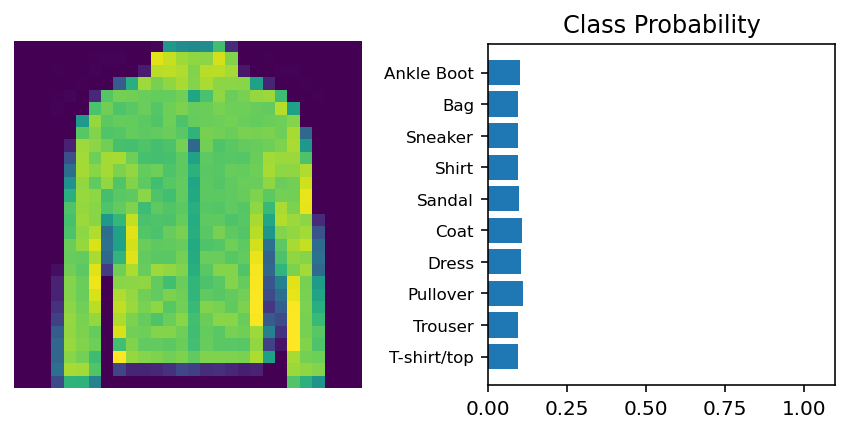

In [11]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import utilities

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
ps = torch.exp(model(img))

# Plot the image and probabilities
utilities.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')